In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

from tensorflow.keras import Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [2]:
# Weather images
path = r"C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach\archive (1)\Multi-class Weather Dataset"
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [3]:
# Loading in the pictures and rescaling them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [4]:
# CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [5]:
# Compiling and running the model
# How many epochs are required to generate an accurate model ?

model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])

model.fit(
    train_generator, 
    epochs = 30,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.5362 - loss: 0.1359 - val_accuracy: 0.6964 - val_loss: 0.1138
Epoch 2/30
 1/28 ━━━━━━━━━━━━━━━━━━━━ 19s 709ms/step - accuracy: 0.5938 - loss: 0.1259

C:\Users\thoma\Documents\Anaconda\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.5938 - loss: 0.1259 - val_accuracy: 0.6741 - val_loss: 0.1080
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 994ms/step - accuracy: 0.6858 - loss: 0.0945 - val_accuracy: 0.7545 - val_loss: 0.0921
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.7812 - loss: 0.0965 - val_accuracy: 0.7991 - val_loss: 0.0840
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 999ms/step - accuracy: 0.8078 - loss: 0.0731 - val_accuracy: 0.7902 - val_loss: 0.0755
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.8125 - loss: 0.0680 - val_accuracy: 0.8080 - val_loss: 0.0694
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8262 - loss: 0.0652 - val_accuracy: 0.7009 - val_loss: 0.1201
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 200ms/step - accuracy: 0.8438 - loss: 0.0557 - val_accuracy: 0.7411 - val_loss: 0.1024
Epoch 9/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8216 - loss: 0.0662 - val_accuracy: 0.7991 - val_lo

In [6]:
results = pd.DataFrame(model.history.history)

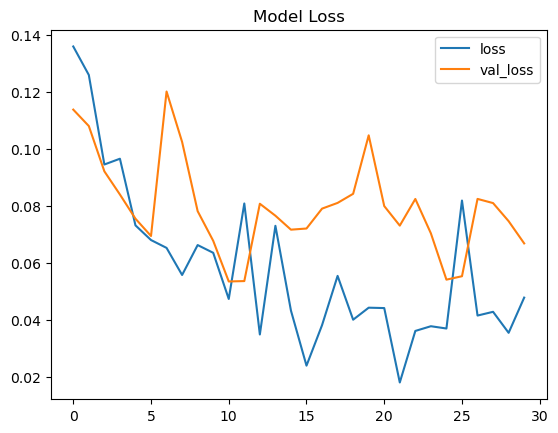

In [7]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

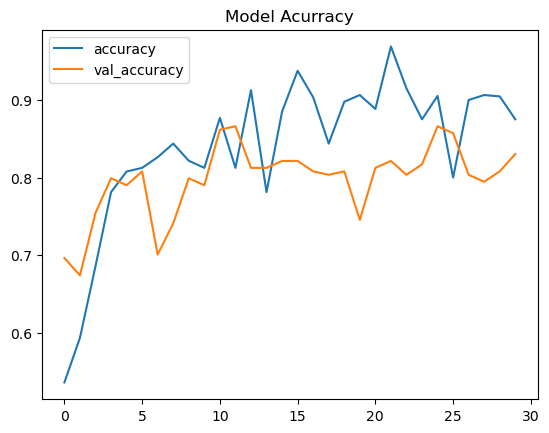

In [8]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [9]:
# Printing accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.875, Val_Accuracy: 0.8303571343421936
Loss: 0.04776205122470856, Val_Loss: 0.06679081916809082


11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step


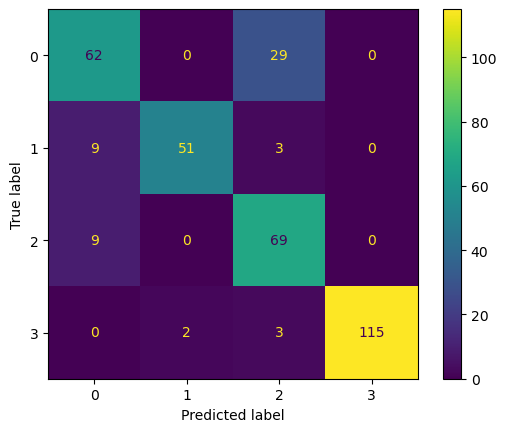

In [10]:
# Collecting n batches of images and displaying the confusion matrix for them

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [11]:
# This function will display a number of random images as well as the predictions for the type of weather

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


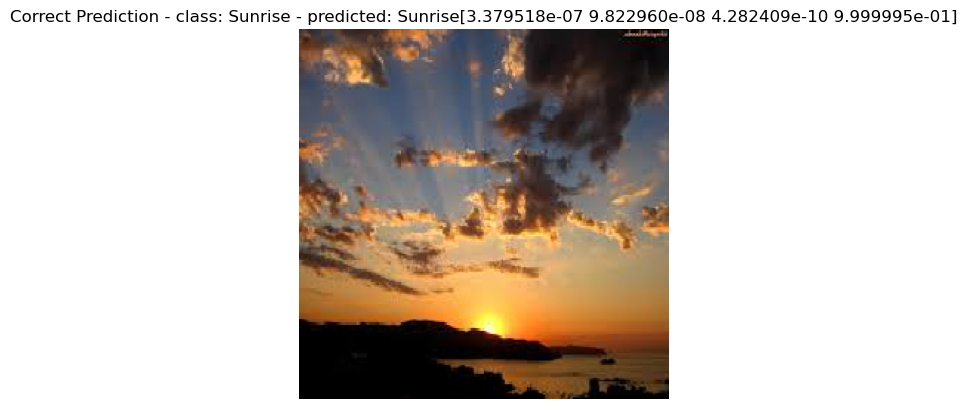

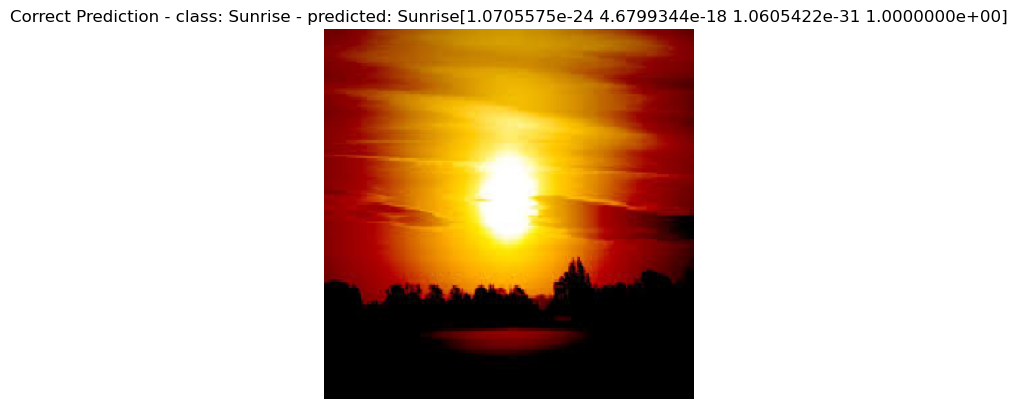

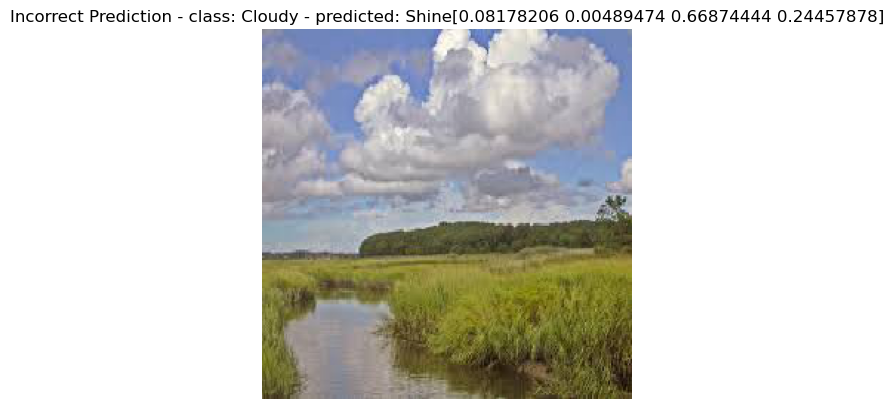

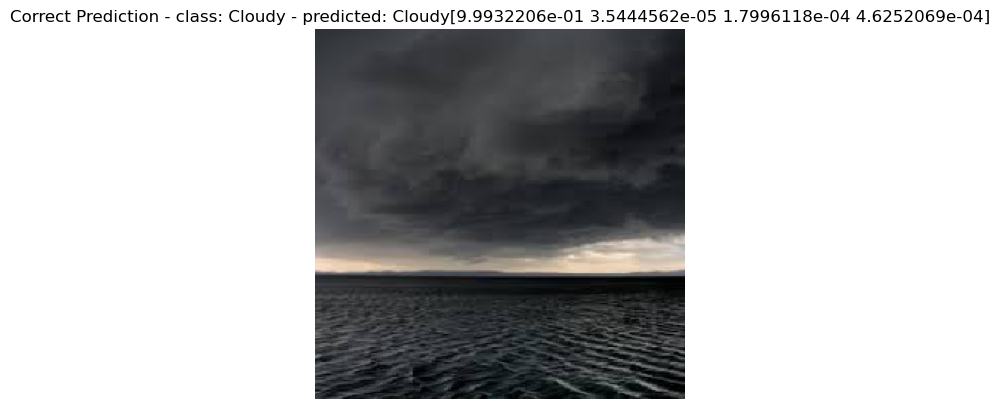

In [12]:
predict_one(model, 4) #<--you can show multiple pictures with this command. Just fill in the number you want to see

# Same procedure using "categorical_crossentropy" as loss this time

In [27]:
datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator2 = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    subset="training",
    class_mode="categorical",
    shuffle=True
)

val_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250, 250),
    batch_size=32,
    subset="validation",
    class_mode="categorical",
    shuffle=False
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [28]:
# Model
inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation='relu')(inputs)
x = MaxPooling2D((3,3))(x)
x = Conv2D(64, (5,5), activation='relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128, (5,5), activation='relu')(x)
x = MaxPooling2D((3,3))(x)
x = Flatten()(x)
x = Dropout(0.5, seed=5)(x)
x = Dense(128, activation='relu')(x)

outputs = Dense(4, activation='softmax')(x)

model2: Model = Model(inputs=inputs, outputs=outputs)

In [29]:
# Compile + fit
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model2.fit(
    train_generator2,
    epochs=30,
    steps_per_epoch=train_generator2.n // train_generator2.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.n // val_generator.batch_size,
)

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 677ms/step - accuracy: 0.5800 - loss: 0.8868 - val_accuracy: 0.6295 - val_loss: 0.7801
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.9062 - loss: 0.4056 - val_accuracy: 0.5268 - val_loss: 1.2030
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 19s 660ms/step - accuracy: 0.7042 - loss: 0.6618 - val_accuracy: 0.7411 - val_loss: 0.7201
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.6000 - loss: 0.7679 - val_accuracy: 0.5759 - val_loss: 1.0582
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 696ms/step - accuracy: 0.7629 - loss: 0.5975 - val_accuracy: 0.7812 - val_loss: 0.5703
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.7188 - loss: 0.5905 - val_accuracy: 0.8036 - val_loss: 0.5336
Epoch 7/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 713ms/step - accuracy: 0.8032 - loss: 0.5002 - val_accuracy: 0.7857 - val_loss: 0.5171
Epoch 8/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8125 - loss: 0.4728 - val_accuracy:

In [30]:
results2 = pd.DataFrame(model2.history.history)

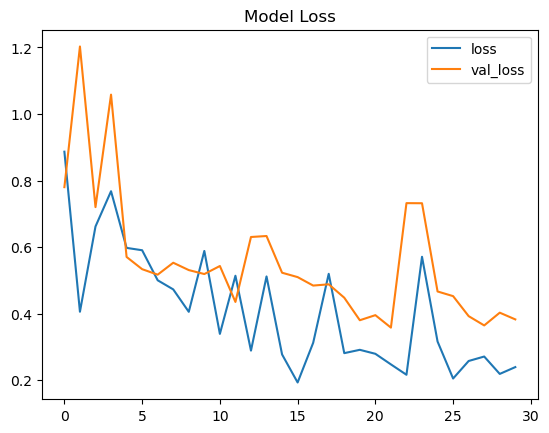

In [31]:
results2[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

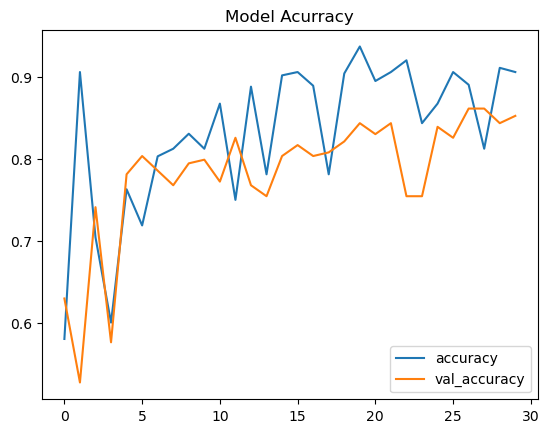

In [32]:
results2[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [33]:
# Printing accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results2['accuracy'].iloc[-1], results2['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results2['loss'].iloc[-1], results2['val_loss'].iloc[-1]))

Accuracy: 0.90625, Val_Accuracy: 0.8526785969734192
Loss: 0.23920860886573792, Val_Loss: 0.3826058804988861


# It seems that using cross-entropy for loss is better, as
# Validation accuracy is higher when comparing both loss measures: 0.83 → 0.85
# While loss numbers are not comparable, as these are on different scales

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step


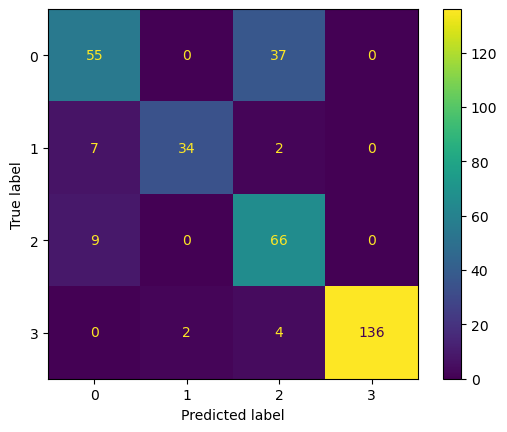

In [35]:
# Collecting n batches of images and displaying the confusion matrix for them

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(val_generator)

for batch in range(n):
    temp = next(val_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm2 = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()
plt.show()

In [36]:
# This function will display a number of random images as well as the predictions for the type of weather

def predict_one(model2, num_images = None):  
    image_batch, classes_batch = next(val_generator)
    predicted_batch = model2.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step


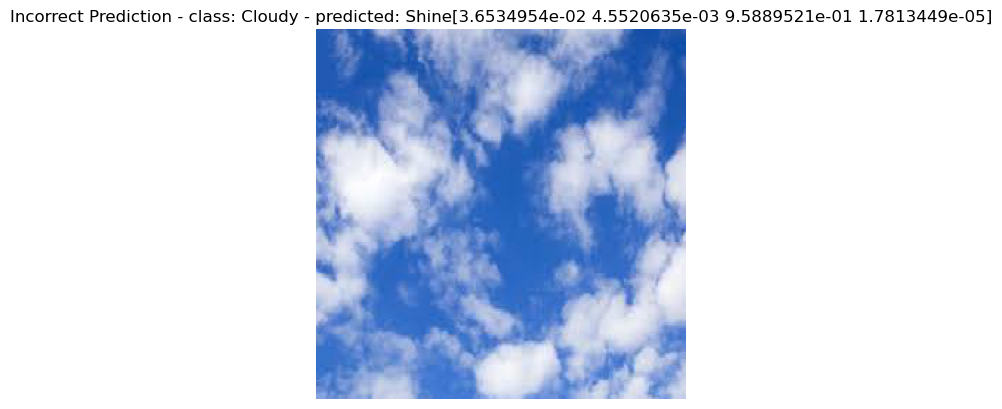

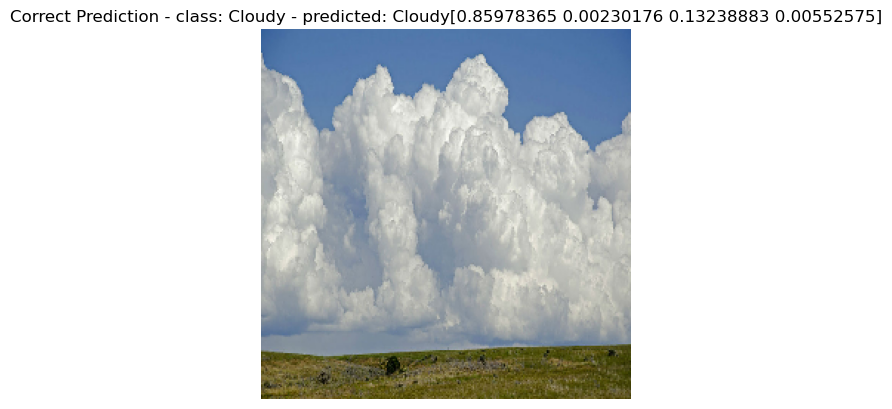

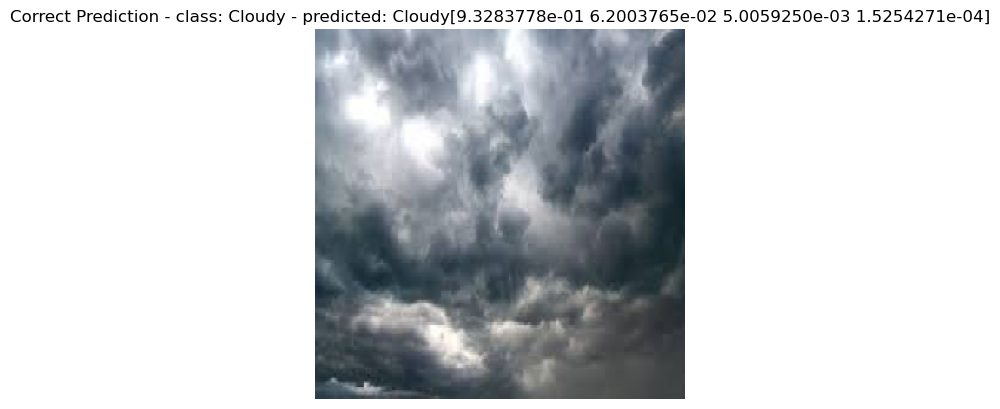

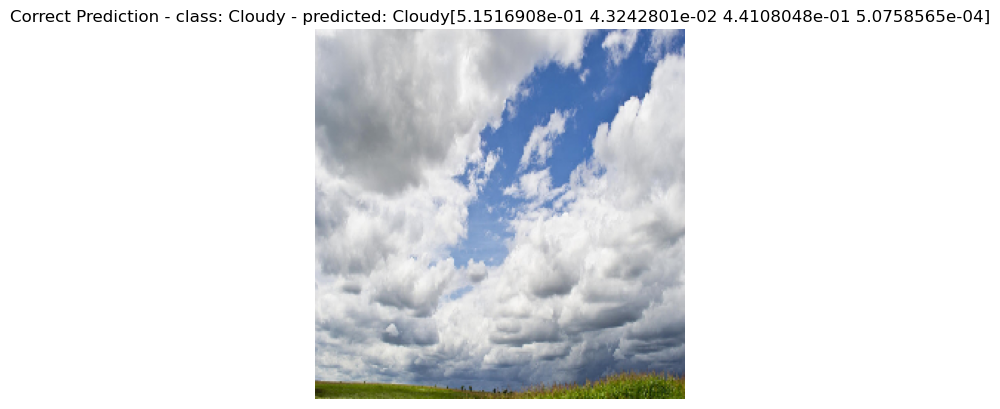

In [37]:
predict_one(model2, 4)